In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from tensorflow.keras.optimizers import Adam

In [2]:
iris = load_iris()
print(type(iris))
print('Data :', iris.data.shape)  # 4개씩 묶어서 150개의 자료가 들어있음 (?)
print('Label :', iris.target.shape)
print('iris datasets keys\n', iris.keys())

<class 'sklearn.utils.Bunch'>
Data : (150, 4)
Label : (150,)
iris datasets keys
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
x = iris.data
y = iris.target

encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1, 1)
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[50:55])
print(y[50:55])

(150, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [4]:
# 공부용, 시험용 데이터 덜어내고 나눠주기?
X_train, X_test, Y_train, Y_test = train_test_split(x, encoded_y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [5]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))  # 차원 수 (???)
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
# 클래스가 3개니까 마지막 출력도 3개, 마지막에 이진분류면 sigmoid, 다중분류면 softmax

In [6]:
# 아담은 제일 똑똑해서 learningRate를 별도 지정하지 않아도 되지만.. 주고싶을땐 지정 가능
# 대신 지정하려면 아담 객채를 만들어서 저렇게 지정해야된다고 함

opt = Adam(lr=0.001)  # 궁금하면 learningRate를 크게 작게 조절해보자
# 이 비율이 크면 최저점 찾기 위한 설정값 자체가 커서 좌우 와리가리 발산한다..
# 비율이 크면 발산하고, 너무 작으면 최저점 찾기 전에 학습이 끝나버릴 수 있음

model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________


In [7]:
fit_hist = model.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=1)

Epoch 1/50
24/24 [==============================] - 0s 743us/step - loss: 0.7469 - accuracy: 0.6583
Epoch 2/50
24/24 [==============================] - 0s 665us/step - loss: 0.4742 - accuracy: 0.7167
Epoch 3/50
24/24 [==============================] - 0s 665us/step - loss: 0.3555 - accuracy: 0.7917
Epoch 4/50
24/24 [==============================] - 0s 788us/step - loss: 0.2030 - accuracy: 0.9417
Epoch 5/50
24/24 [==============================] - 0s 706us/step - loss: 0.2483 - accuracy: 0.8833
Epoch 6/50
24/24 [==============================] - 0s 748us/step - loss: 0.1762 - accuracy: 0.9417
Epoch 7/50
24/24 [==============================] - 0s 956us/step - loss: 0.1246 - accuracy: 0.9667
Epoch 8/50
24/24 [==============================] - 0s 790us/step - loss: 0.2339 - accuracy: 0.8917
Epoch 9/50
24/24 [==============================] - 0s 706us/step - loss: 0.1341 - accuracy: 0.9500
Epoch 10/50
24/24 [==============================] - 0s 665us/step - loss: 0.2497 - accuracy: 0.8833

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Final test set accuracy :', score[1])  # 검증정확도가 얼마나 되는지

Final test set accuracy : 1.0


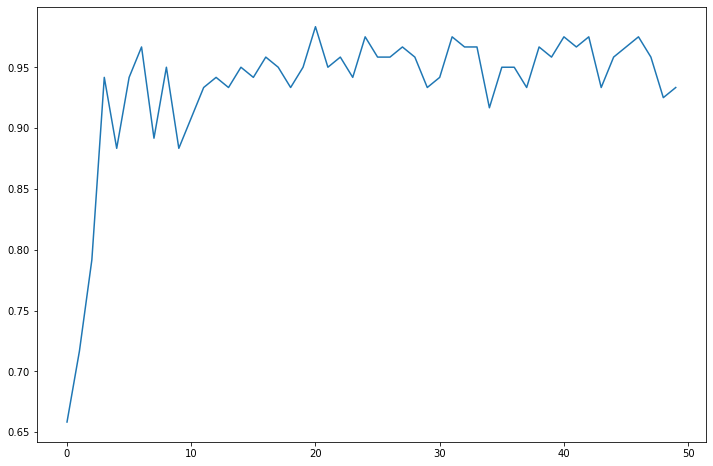

In [9]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [10]:
my_sample = np.random.randint(30)
sample = X_test[my_sample]
print(sample)
sample = sample.reshape(-1, 4)
print(sample)
pred = model.predict(sample)
print('pred is :', pred)
print('actual is :', Y_test[my_sample])
print('Target :',
      iris.target_names[np.argmax(Y_test[my_sample])])
print('Prediction after learning is :',
      iris.target_names[np.argmax(pred)])

[7.3 2.9 6.3 1.8]
[[7.3 2.9 6.3 1.8]]
pred is : [[9.5099458e-06 4.1154522e-02 9.5883602e-01]]
actual is : [0. 0. 1.]
Target : virginica
Prediction after learning is : virginica
